<a href="https://colab.research.google.com/github/pedroafleite/attrition/blob/main/attrition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Attrition Data Analysis

*Attrition* significa atrito, desgaste.  É um termo conhecido no inglês para se referir à perda natural de funcionários da empresa, seja por aposentadoria, demissão, condições de saúde, e outros motivos.

Funcionários são a coisa mais importante de qualquer empresa e sua perda pode acarretar diversos problemas. Perder funcionários experientes é um processo por si caro, mas afeta também a produtividade e o lucro da empresa em geral.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
def ignore_warn(*args, **kwargs):
    pass
warnings.warn = ignore_warn # ignorar alertas do jupyter notebook

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Descrição dos Dados

In [2]:
df = pd.read_excel("/content/drive/MyDrive/Colab Notebooks/people_analytics/Dataset.xlsx")
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [3]:
df.shape

(1470, 35)

In [4]:
df.isna().sum() # dataset não possui valores nulos!

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [6]:
df.describe(include='all')

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470,1470,1470.000000,1470,1470.000000,1470.000000,1470,1470.0,1470.000000,1470.000000,1470,1470.000000,1470.000000,1470.000000,1470,1470.000000,1470,1470.000000,1470.000000,1470.000000,1470,1470,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
unique,NaN,2,3,NaN,3,NaN,NaN,6,NaN,NaN,NaN,2,NaN,NaN,NaN,9,NaN,3,NaN,NaN,NaN,1,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,No,Travel_Rarely,NaN,Research & Development,NaN,NaN,Life Sciences,NaN,NaN,NaN,Male,NaN,NaN,NaN,Sales Executive,NaN,Married,NaN,NaN,NaN,Y,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1233,1043,NaN,961,NaN,NaN,606,NaN,NaN,NaN,882,NaN,NaN,NaN,326,NaN,673,NaN,NaN,NaN,1470,1054,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,36.923810,NaN,NaN,802.485714,NaN,9.192517,2.912925,NaN,1.0,1024.865306,2.721769,NaN,65.891156,2.729932,2.063946,NaN,2.728571,NaN,6502.931293,14313.103401,2.693197,NaN,NaN,15.209524,3.153741,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,NaN,NaN,403.509100,NaN,8.106864,1.024165,NaN,0.0,602.024335,1.093082,NaN,20.329428,0.711561,1.106940,NaN,1.102846,NaN,4707.956783,7117.786044,2.498009,NaN,NaN,3.659938,0.360824,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,NaN,NaN,102.000000,NaN,1.000000,1.000000,NaN,1.0,1.000000,1.000000,NaN,30.000000,1.000000,1.000000,NaN,1.000000,NaN,1009.000000,2094.000000,0.000000,NaN,NaN,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,NaN,NaN,465.000000,NaN,2.000000,2.000000,NaN,1.0,491.250000,2.000000,NaN,48.000000,2.000000,1.000000,NaN,2.000000,NaN,2911.000000,8047.000000,1.000000,NaN,NaN,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,NaN,NaN,802.000000,NaN,7.000000,3.000000,NaN,1.0,1020.500000,3.000000,NaN,66.000000,3.000000,2.000000,NaN,3.000000,NaN,4919.000000,14235.500000,2.000000,NaN,NaN,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,NaN,NaN,1157.000000,NaN,14.000000,4.000000,NaN,1.0,1555.750000,4.000000,NaN,83.750000,3.000000,3.000000,NaN,4.000000,NaN,8379.000000,20461.500000,4.000000,NaN,NaN,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000


Variáveis com valores únicos determinados (**unique**  > 0) podem ser consideradas categóricas. No entanto, essas variáveis categóricas estão classificadas como `string` (`object` dtype). Seria melhor reclassificá-las com algorismos inteiros para modelarmos os dados.

In [35]:
categories = ['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'OverTime']
df_encoded = df.copy(deep=True)

In [36]:
from sklearn import preprocessing

lab_enc = preprocessing.LabelEncoder()
for col in categories:
        df_encoded[col] = lab_enc.fit_transform(df[col])
        name_mapping = dict(zip(lab_enc.classes_, lab_enc.transform(lab_enc.classes_)))
        print('Feature', col)
        print('mapping', name_mapping)

Feature Attrition
mapping {'No': 0, 'Yes': 1}
Feature BusinessTravel
mapping {'Non-Travel': 0, 'Travel_Frequently': 1, 'Travel_Rarely': 2}
Feature Department
mapping {'Human Resources': 0, 'Research & Development': 1, 'Sales': 2}
Feature EducationField
mapping {'Human Resources': 0, 'Life Sciences': 1, 'Marketing': 2, 'Medical': 3, 'Other': 4, 'Technical Degree': 5}
Feature Gender
mapping {'Female': 0, 'Male': 1}
Feature JobRole
mapping {'Healthcare Representative': 0, 'Human Resources': 1, 'Laboratory Technician': 2, 'Manager': 3, 'Manufacturing Director': 4, 'Research Director': 5, 'Research Scientist': 6, 'Sales Executive': 7, 'Sales Representative': 8}
Feature MaritalStatus
mapping {'Divorced': 0, 'Married': 1, 'Single': 2}
Feature OverTime
mapping {'No': 0, 'Yes': 1}


Assim, iremos nos referir a este dicionário **name_mapping** para nos referirmos aos significados dos algorismos da tabela.

Outras variáveis quantitativas representadas por poucos valores integrais também podem ser consideradas categóricas (**Education, EmployCount, EnvironmentSatisfaction, JobInvolvement, JobLevel, JobSatisfaction, NumCompaniesWorked, PerformanceRating, RelationshipSatisfaction, TrainingTimesLastYear, WorkLifeBalance**). 

## Análise Exploratória dos Dados

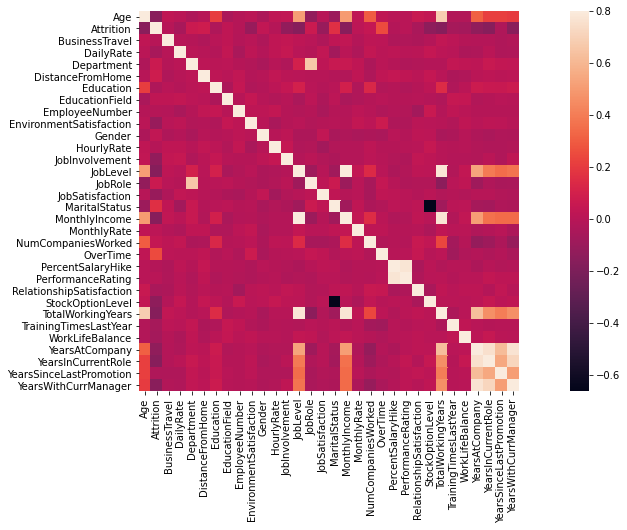

In [42]:
# correlation matrix (heatmap)
corrmat = df_encoded.drop(['EmployeeCount', 'StandardHours'], axis=1).corr() # eliminar colunas irrelevantes para o heatmap
f, ax = plt.subplots(figsize=(18, 7))
sns.heatmap(corrmat, vmax=.8, square=True, cbar=True);

Podemos entender várias correlações dos nossos dados através do heatmap acima:

- Salário (**MonthlyIncome**) é altamente correlacionado ao número total de anos do profissional no mercado de trabalho (**TotalWorkingYears**). 
- Salário (**MonthlyIncome**) também é correlacionado ao nível hierárquivo da profissão (**JobLevel**)
- Em menor grau, salário (**MonthlyIncome**) é correlacionado à idade do profissional (**Age**) e anos trabalhados na empresa (**YearsAtCompany**). 
- Ainda em menor escala, salário também é correlacionado com anos no papel atual (**YearsInCurrentRole**), anos desde a última promoção (**YearsSinceLastPromotion**), e anos com o atual gerente (**YearsWithCurrManager**).
- Estas últimas variáveis são bastante correlacionáveis entre si: anos trabalhados na empresa (**YearsAtCompany**), anos no papel atual (**YearsInCurrentRole**), anos desde a última promoção (**YearsSinceLastPromotion**), e anos com o atual gerente (**YearsWithCurrManager**).
- As quatro variáveis acima (**YearsAtCompany**, **YearsInCurrentRole**, **YearsSinceLastPromotion**, **YearsWithCurrManager**) também são correlacionadas em menor escala com salário (**MonthlyIncome**) e nível hierárquivo da profissão (**JobLevel**), e em menor escala ainda, com idade (**Age**).
- Algumas variáveis estão constantemente correlacionadas em menor grau entre si: educação (**Education**), anos do profissional no mercado de trabalho (**TotalWorkingYears**), número de empresas trabalhadas (**NumCompaniesWorked**), salário (**MonthlyIncome**), e nível hierárquivo da profissão (**JobLevel**).
- A opção de ações da empresa no salário (**StockOptionsLevel**) possui maior correlação com a taxa de salário/hora (**HourlyRate**) e o número do funcionário (**EmployeeNumber**). Estas correlações podem ser porque, nos estágios iniciais da empresa, quando o número de funcionários era menor, a empresa oferecia uma porcentagem maior de ações no holerite. Funcionários fundadores aparentemente também tendem a se dedicar menos horas à empresa com o passar dos anos.
- Satisfação com relacionamentos dentro da empresa (**RelationshipSatisfaction**) apresentam uma correlação inversa com as variáveis apresentadas acima (**EmployeeNumber** e **StockOptionsLevel**). Isso pode ter relação com o tamanho da empresa: conforme ela foi crescendo, os relacionamentos pessoais se tornaram mais frígidos.

Os dois últimos tópicos levantados são especulativos e merecem ser estudados mais a fundo. 

Vamos explorar cada item para entender seus padrões de forma mais assertiva.

In [31]:
df['Attrition'].value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

In [39]:
print(pd.DataFrame({'Percentage (%)': (df.groupby(('Attrition')).size()*100) / len(df)}))

           Percentage (%)
Attrition                
No              83.877551
Yes             16.122449


Isso requer atenção durante a modelagem porque os dados são *desbalanceados* com relação à Attrition. Ao avaliarmos o modelo, devemos balancear o modelo; ou seja, compararmos proporções semelhantes de Yes/No Attrition.

### Idade

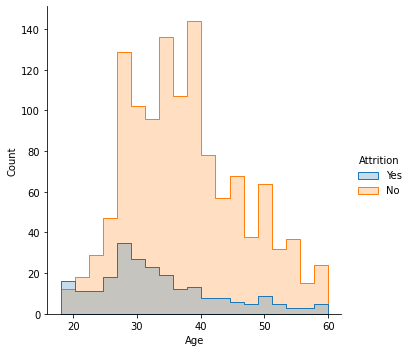

In [37]:
sns.displot(df, x="Age", hue="Attrition", element="step");

- Funcionários jovens entre 20-30 possuem grande chance de saírem.
- Chances de sair diminuem proporcionalmente com o aumento de idade entre os 30-40 anos.

Para quantitativizar essa medida, vamos dividir a tabela em funcionários perdidos (**Attrition** == 1) e funcionários mantidos (**Attrition** == 0). Depois, mediremos a assimetria e curtose dos respectivos conjuntos.

In [41]:
yes_attrition_df = df_encoded.loc[df_encoded['Attrition'] == 1]
no_attrition_df = df_encoded.loc[df_encoded['Attrition'] == 0]

In [45]:
print("Funcionários perdidos (por idade):")
print("Assimetria: %f" % yes_attrition_df['Age'].skew())
print("Curtose: %f" % yes_attrition_df['Age'].kurt())
print("======")
print("Funcionários mantidos (por idade):")
print("Assimetria: %f" % no_attrition_df['Age'].skew())
print("Curtose: %f" % no_attrition_df['Age'].kurt())

Funcionários perdidos (por idade):
Assimetria: 0.715732
Curtose: -0.057044
Funcionários mantidos (por idade):
Assimetria: 0.408122
Curtose: -0.411835


### Viagem de negócios

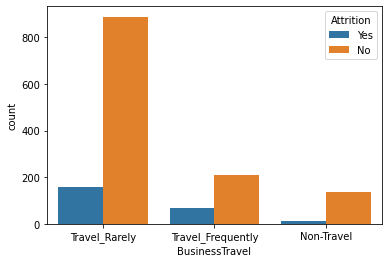

In [47]:
sns.countplot(x="BusinessTravel", hue="Attrition", data=df);

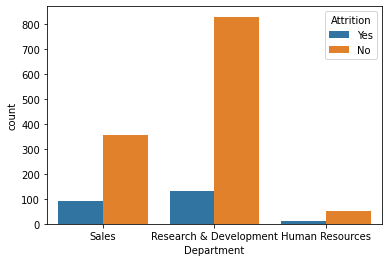

In [48]:
sns.countplot(x="Department", hue="Attrition", data=df);

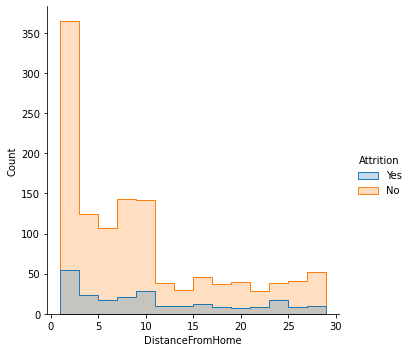

In [50]:
sns.displot(df, x="DistanceFromHome", hue="Attrition", element="step");

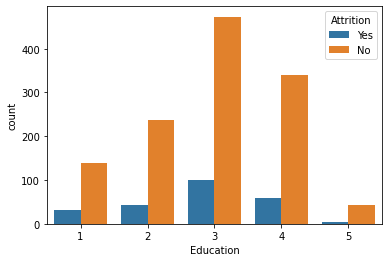

In [51]:
sns.countplot(x="Education", hue="Attrition", data=df);

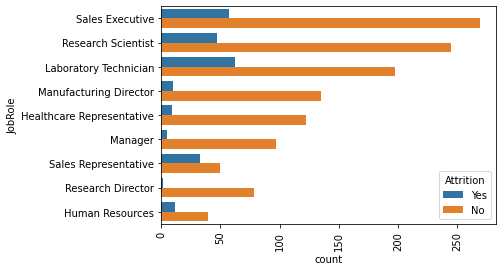

In [56]:
sns.countplot(y="JobRole", hue="Attrition", data=df)
plt.xticks(rotation=90);

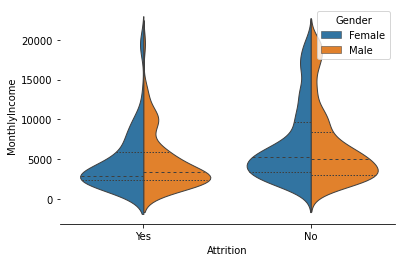

In [62]:
sns.violinplot(data=df, x="Attrition", y="MonthlyIncome", hue="Gender",
               split=True, inner="quart", linewidth=1)
sns.despine(left=True)

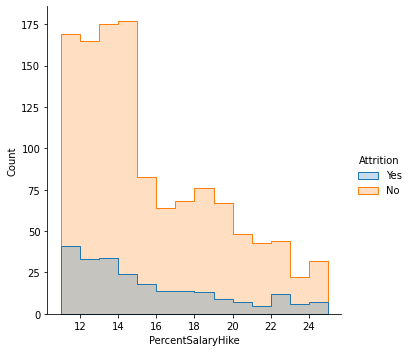

In [79]:
sns.displot(x="PercentSalaryHike", hue="Attrition", data=df, element="step");

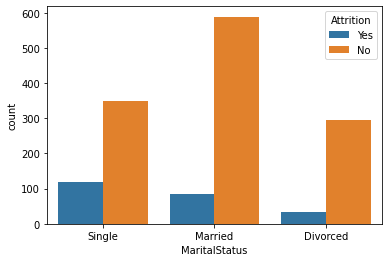

In [104]:
sns.countplot(x="MaritalStatus", hue="Attrition", data=df);

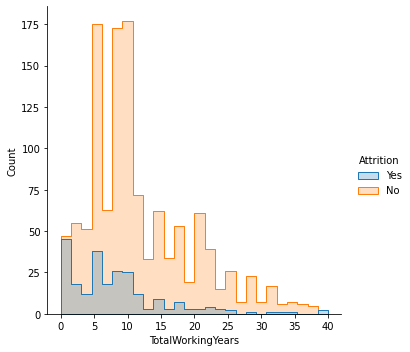

In [105]:
sns.displot(x="TotalWorkingYears", hue="Attrition", data=df, element="step");

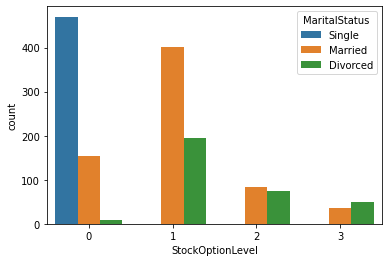

In [109]:
sns.countplot(x="StockOptionLevel", hue="MaritalStatus", data=df);

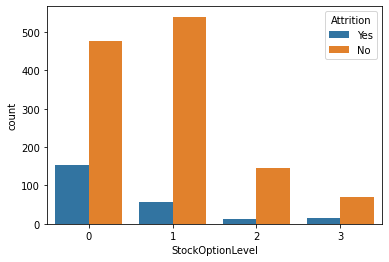

In [110]:
sns.countplot(x="StockOptionLevel", hue="Attrition", data=df);

In [8]:
dfs = df[['Age','DailyRate','DistanceFromHome', 'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel', 
          'JobSatisfaction', 'RelationshipSatisfaction', 'StockOptionLevel', 'TrainingTimesLastYear']]
cat = df[['Attrition', 'BusinessTravel','Department','EducationField','Gender','JobRole','MaritalStatus','Over18', 'OverTime']]

In [9]:
val = {'Yes':1, 'No':0}
cat['Attrition'] = cat["Attrition"].apply(lambda x: val[x])
cat.head()

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
0,1,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single,Y,Yes
1,0,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married,Y,No
2,1,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Single,Y,Yes
3,0,Travel_Frequently,Research & Development,Life Sciences,Female,Research Scientist,Married,Y,Yes
4,0,Travel_Rarely,Research & Development,Medical,Male,Laboratory Technician,Married,Y,No


In [10]:
cat = pd.get_dummies(cat)
cat.head()

,Attrition,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Human Resources,Department_Research & Development,Department_Sales,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Female,Gender_Male,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,Over18_Y,OverTime_No,OverTime_Yes
0,1,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,1
1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1,1,0
2,1,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,1,0,1
3,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,1
4,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,1,0


In [11]:
df_final = pd.concat([dfs, cat], axis=1)
df_final.head()

,Age,DailyRate,DistanceFromHome,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,RelationshipSatisfaction,StockOptionLevel,TrainingTimesLastYear,Attrition,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Human Resources,Department_Research & Development,Department_Sales,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Female,Gender_Male,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,Over18_Y,OverTime_No,OverTime_Yes
0,41,1102,1,2,94,3,2,4,1,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,1
1,49,279,8,3,61,2,2,2,4,1,3,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1,1,0
2,37,1373,2,4,92,2,1,3,2,0,3,1,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,1,0,1
3,33,1392,3,4,56,3,1,3,3,0,3,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,1
4,27,591,2,1,40,3,1,2,4,1,3,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,1,0


In [16]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

target = df_final['Attrition']
features = df_final.drop('Attrition', axis = 1)

In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

In [18]:
model = RandomForestClassifier()
model.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [19]:
test_pred = model.predict(X_test)
accuracy_score(y_test, test_pred)

0.8843537414965986